# Importing Dependencies

In [1]:
#kaggle
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import random
import numpy as np
import tensorflow as tf

In [2]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# Loading Dataset


In [3]:
!pip install kaggle

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105797 sha256=37070f9ac7b47592319a951dd64d8cc96bd2df1d21a4798b1d8bb72f5ba883e4
  Stored in directory: c:\users\brian biju\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [4]:
kaggle_load = json.load(open('kaggle.json'))

In [5]:
# Setup Kaggle API Key & Username as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_load['username']
os.environ['KAGGLE_KEY'] = kaggle_load['key']

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:01<48:47, 748kB/s]
  0%|          | 2.00M/2.04G [00:01<24:39, 1.48MB/s]
  0%|          | 3.00M/2.04G [00:01<17:24, 2.09MB/s]
  0%|          | 4.00M/2.04G [00:02<12:20, 2.95MB/s]
  0%|          | 5.00M/2.04G [00:02<09:27, 3.85MB/s]
  0%|          | 6.00M/2.04G [00:02<08:56, 4.07MB/s]
  0%|          | 7.00M/2.04G [00:02<07:23, 4.92MB/s]
  0%|          | 8.00M/2.04G [00:02<06:17, 5.78MB/s]
  0%|          | 9.00M/2.04G [00:02<05:52, 6.18MB/s]
  0%|          | 10.0M/2.04G [00:02<05:58, 6.08MB/s]
  1%|          | 11.0M/2.04G [00:03<06:24, 5.67MB/s]
  1%|          | 12.0M/2.04G [00:03<05:59, 6.06MB/s]
  1%|          | 13.0M/2.04G [00:03<06:03, 5.98MB/s]
  1%|          | 14.0M/2.04G [00:03<06:11, 5.86MB/s]
  1%|          | 15.0M/2.04G [00:03<06:38, 5.46MB/s]
  1%|          | 16.0M/2.04G [00:04<06:35, 5.49MB/s]
  1%|          | 17.0M/2.04G [00:04<06:41, 5.41MB/s]
  1%|          | 18.0M/2.04G [00:04<06:45, 5.35MB/s]
  

In [7]:
#Unzip file
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [8]:
#Our Dataset Info
print(os.listdir('plantvillage dataset'))

print('Size of Color:',len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print('Size of Grayscale:',len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

print('Size of Segmented:',len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/segmented')[:5])

['color', 'grayscale', 'segmented']
Size of Color: 38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
Size of Grayscale: 38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
Size of Segmented: 38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [9]:
print('Number of images in a Color folder:',len(os.listdir('plantvillage dataset/color/Grape___healthy')))
print(os.listdir('plantvillage dataset/color/Grape___healthy')[:5])

Number of images in a Color folder: 423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


# Data Preprocessing

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Brian Biju\AppData\Local\Temp\ipykernel_11984\4262775110.py:2: SyntaxWarning: invalid escape sequence '\P'
  image_path = 'E:\Plant Disease Classifier\Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_img1.JPG'


(256, 256, 3)


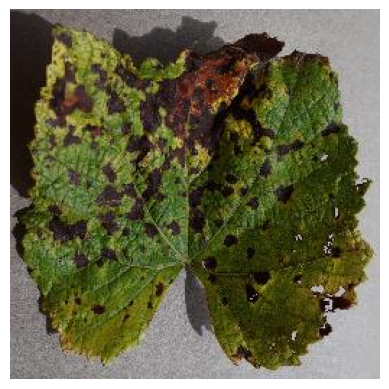

In [2]:
#Reading any image
image_path = 'E:\Plant Disease Classifier\Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_img1.JPG'
#Displaying image shape
img = mpimg.imread(image_path)
print(img.shape)
#Displaying image
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
#Dataset for Training and testing
dataset = 'plantvillage dataset/color'

In [4]:
# Image Parameters
img_size = 224
batch_size = 32

In [5]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2  # 20% of data for validation
)

## Train Generator

In [6]:
train_generator = data_gen.flow_from_directory(
    dataset,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


## Validation Generator

In [7]:
validation_generator = data_gen.flow_from_directory(
    dataset,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


# Convolutional Neural Network

### CNN Model

In [8]:
train_generator.num_classes

38

In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[img_size, img_size, 3]))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=128, activation='relu'))
cnn.add(layers.Dense(train_generator.num_classes, activation='softmax'))


C:\Users\Brian Biju\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Model Summary
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,912,294 (91.22 MB)

 Trainable params: 23,912,294 (91.22 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Model Training

In [14]:
Model = cnn.fit(
    train_generator,
    #steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator
    #validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 586s 431ms/step - accuracy: 0.9050 - loss: 0.0181 - val_accuracy: 0.8981 - val_loss: 0.0194
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 614s 452ms/step - accuracy: 0.9637 - loss: 0.0091 - val_accuracy: 0.8898 - val_loss: 0.0217
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 602s 443ms/step - accuracy: 0.9861 - loss: 0.0049 - val_accuracy: 0.8921 - val_loss: 0.0245
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 600s 441ms/step - accuracy: 0.9924 - loss: 0.0034 - val_accuracy: 0.8962 - val_loss: 0.0272
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 608s 448ms/step - accuracy: 0.9953 - loss: 0.0025 - val_accuracy: 0.8648 - val_loss: 0.0395


### Model Evaluation

In [15]:
print('Evaluating model....')
val_loss, val_accuracy = cnn.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model....
339/339 ━━━━━━━━━━━━━━━━━━━━ 42s 123ms/step - accuracy: 0.8625 - loss: 0.0411
Validation Accuracy: 86.48%


### Plotting Loss & Accuracy values

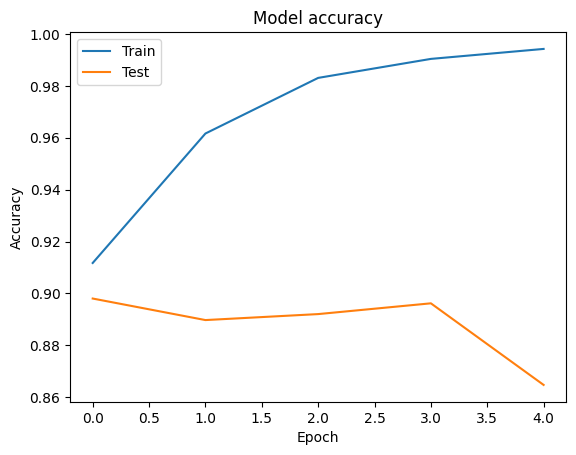

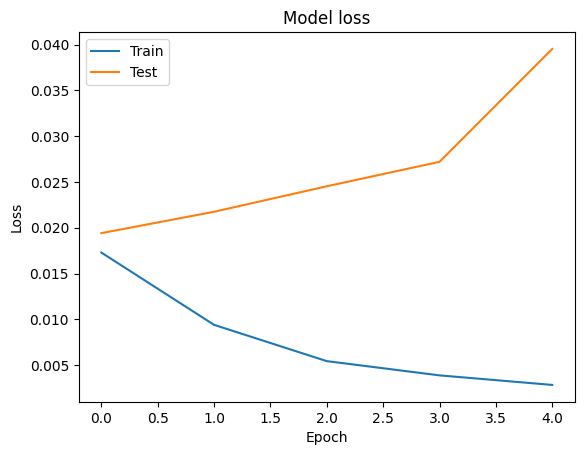

In [16]:
# Plot training & validation accuracy values
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()


## A Predictive System

In [34]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    #Load image
    img = Image.open(image_path)
    #Resize Image
    img = img.resize(target_size)
    # Converting image to Numpy array
    img_array = np.array(img)
    #Adding batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    #Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

#Function to Predict the Class of the Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = cnn.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [35]:
#Mapping class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [32]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [28]:
# Saving class names as json file
json.dump(class_indices, open('class_indices.json','w'))

In [36]:
#Example usage
image_path = "E:\Plant Disease Classifier\Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_img1.JPG"

predicted_class_name = predict_image_class(cnn, image_path, class_indices)

print('Predicted Class Name:', predicted_class_name)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Brian Biju\AppData\Local\Temp\ipykernel_13648\3267398606.py:2: SyntaxWarning: invalid escape sequence '\P'
  image_path = "E:\Plant Disease Classifier\Grape___Leaf_blight_(Isariopsis_Leaf_Spot)_img1.JPG"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicted Class Name: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


## Saving the Model

In [38]:
cnn.save('prediction_model.keras')